In [27]:
#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report

In [29]:
#Reading the dataset

import pandas as pd
import numpy as np

# create header for dataset
header = ['age','bp','sg','al','su','rbc','pc','pcc',
    'ba','bgr','bu','sc','sod','pot','hemo','pcv',
    'wbcc','rbcc','htn','dm','cad','appet','pe','ane',
    'classification']
# read the dataset
df = pd.read_csv("/home/syed/ckd_prediction/dataset/chronic_kidney_disease.arff",
        header=None,
        names=header
       )

In [30]:
df.shape

(400, 25)

In [31]:
# remove '\t' from all columns
for col in df.columns:
    df[col] = df[col].str.replace('\t', '')

In [32]:
# strip blank spaces from all cells using applymap and strip methods
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [33]:
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)

In [34]:
# total NaN values in column 'B'
print(df.isnull().sum().sum())

1012


In [35]:
for col in df:
    print(df[col].name)
    print(df[col].unique())

age
['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' nan '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79']
bp
['80' '50' '70' '90' nan '100' '60' '110' '140' '180' '120']
sg
['1.020' '1.010' '1.005' '1.015' nan '1.025']
al
['1' '4' '2' '3' '0' nan '5']
su
['0' '3' '4' '1' nan '2' '5']
rbc
[nan 'normal' 'abnormal']
pc
['normal' 'abnormal' nan]
pcc
['notpresent' 'present' nan]
ba
['notpresent' 'present' nan]
bgr
['121' nan '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '79' '207' '124' '144'
 '91' '162' '246' '253' '141' '182' '86' '150' '146' '425' '112' '250'
 '360' '163' '

In [36]:
for col in df:
    print(df[col].name)
    print(df[col].isnull().sum())

age
9
bp
12
sg
47
al
46
su
49
rbc
152
pc
65
pcc
4
ba
4
bgr
44
bu
19
sc
17
sod
87
pot
88
hemo
52
pcv
71
wbcc
106
rbcc
131
htn
2
dm
2
cad
2
appet
1
pe
1
ane
1
classification
0


In [37]:
#Categorical to numerical:
df =df.replace({'yes':1 ,'no':0,'present':1 , 'notpresent':0, 'normal':1,'abnormal':0,"good":1,"poor":0, 'ckd': 1 , 'notckd': 0})

In [38]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,NaN,1.0,0.0,0.0,121,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7,50,1.020,4,0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62,80,1.010,2,3,1.0,1.0,0.0,0.0,423,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48,70,1.005,4,0,1.0,0.0,1.0,0.0,117,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51,80,1.010,2,0,1.0,1.0,0.0,0.0,106,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1.0,1.0,0.0,0.0,140,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42,70,1.025,0,0,1.0,1.0,0.0,0.0,75,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12,80,1.020,0,0,1.0,1.0,0.0,0.0,100,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17,60,1.025,0,0,1.0,1.0,0.0,0.0,114,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [39]:
df['classification'].unique()

array([1, 0])

In [40]:
# count the number of samples in each class
class_counts = df['classification'].value_counts()

# calculate the proportion of each class
class_proportions = class_counts / len(df)

# display the class proportions
print(class_proportions)

1    0.625
0    0.375
Name: classification, dtype: float64


In [41]:
#Dealing with abnormally values:
df=df.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"})

In [42]:
# Deal with missing value:
imputer=IterativeImputer(estimator=RandomForestRegressor(n_estimators= 100))
df=imputer.fit_transform(df)
# feature_names_in_=["rbc",'pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
df =pd.DataFrame(df,columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'])

/home/syed/ls/envs/py39/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [45]:
df['age'].nunique()

85

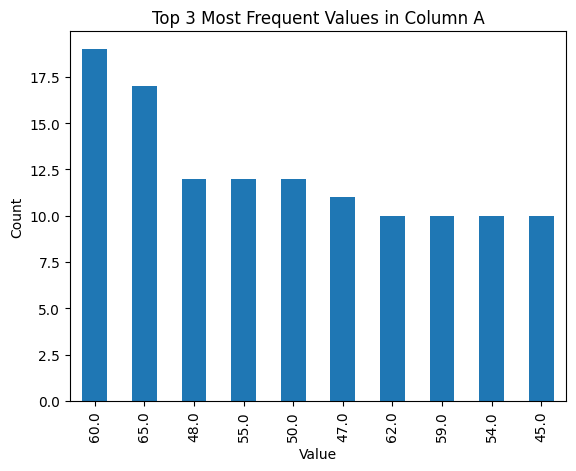

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = df['age'].value_counts()
# Select the top 3 most frequent values
top_values = value_counts.head(10)

# Create a bar plot of the top 3 most frequent values
top_values.plot(kind='bar')
plt.title('Top 3 Most Frequent Values in Column A')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()





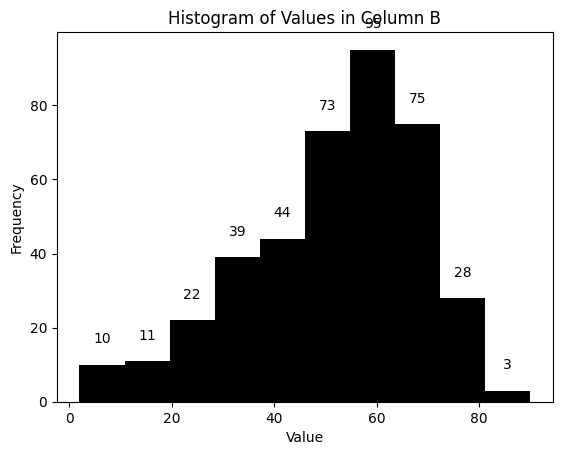

In [57]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['age'], bins=10, color='black')

# Add the value for each bar to the upper head of the bar
for i in range(len(patches)):
    ax.text(patches[i].get_x() + patches[i].get_width() / 2,
            patches[i].get_height() + 5,
            str(int(patches[i].get_height())),
            ha='center',
            va='bottom')

plt.title('Histogram of Values in Column B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()





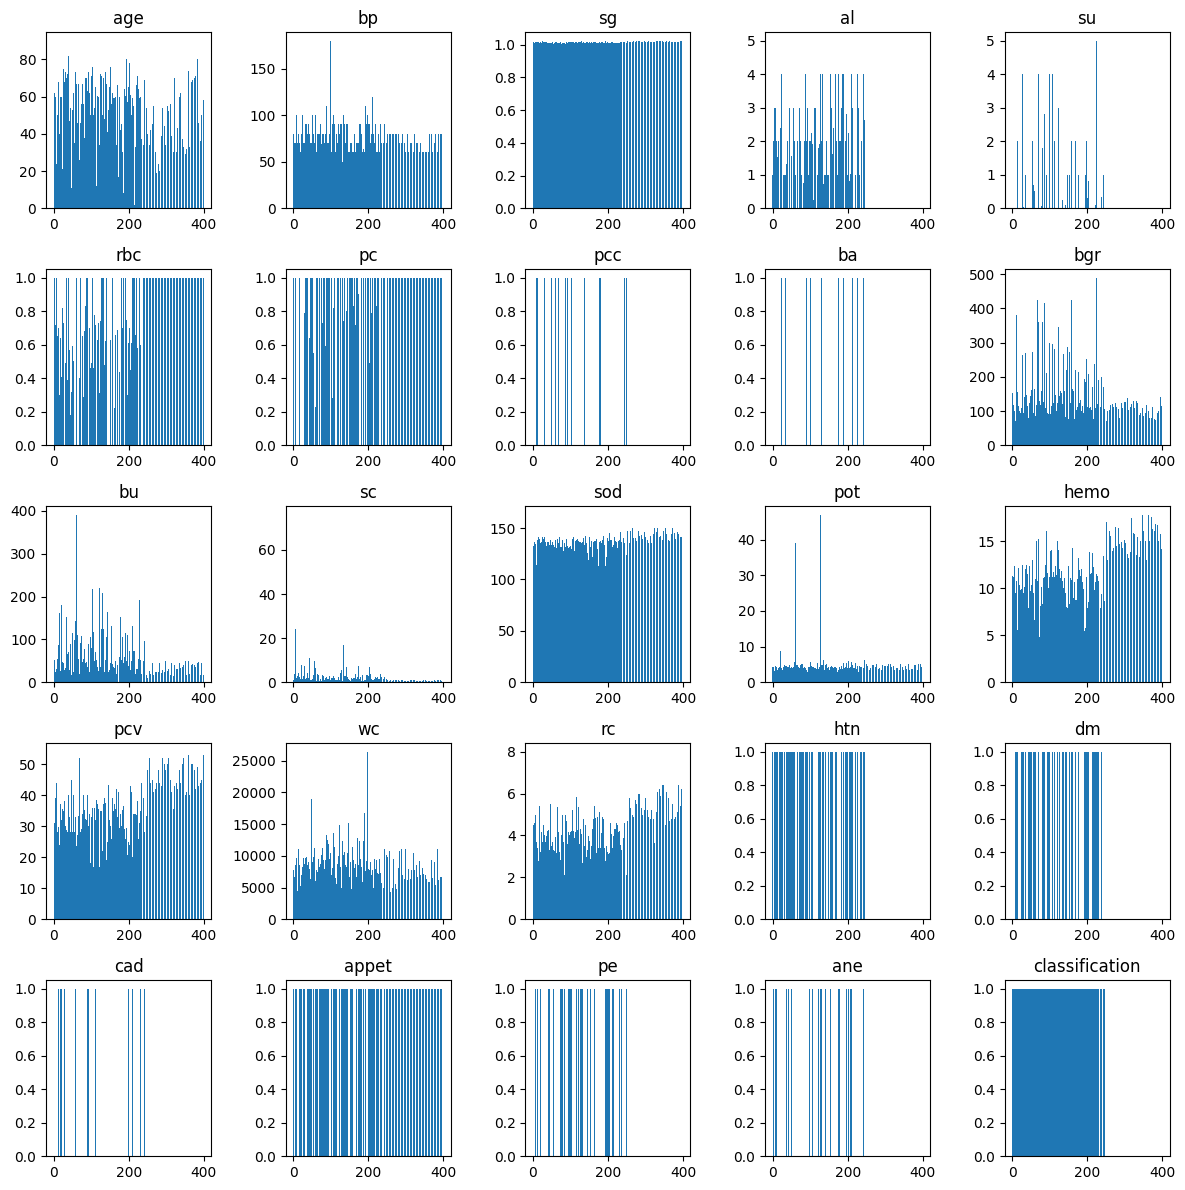

In [59]:
# Create a 5 x 5 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

# Iterate over the columns of the DataFrame and create a bar plot for each column in a subplot
for i, col in enumerate(df.columns):
    ax = axes[i // 5, i % 5]
    ax.bar(df.index, df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

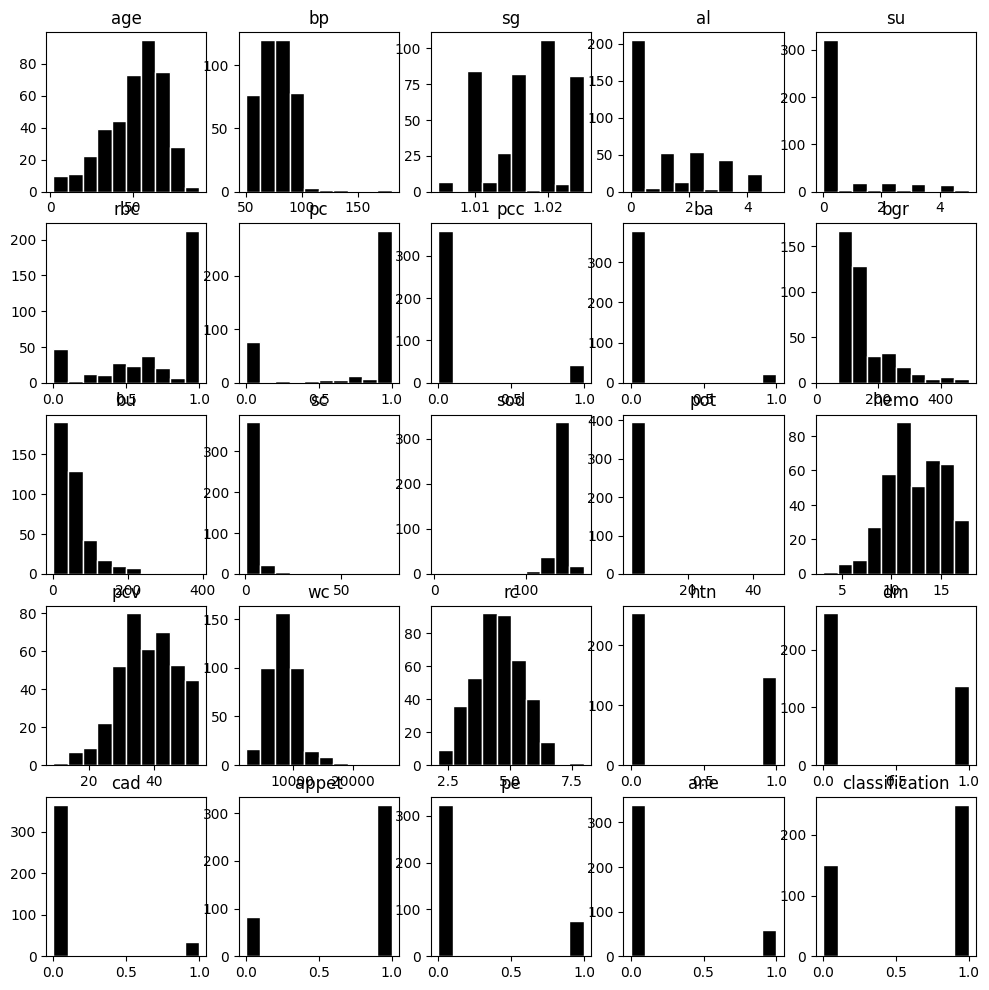

In [72]:
# Create a 5 x 5 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

# Iterate over the columns of the DataFrame and create a histogram plot for each column in a subplot
for i, col in enumerate(df.columns):
    ax = axes[i // 5, i % 5]
    ax.hist(df[col], color='black', edgecolor='white')
    ax.set_title(col)
    
    # Get the counts for each bin of the histogram
    counts, bins, patches = ax.hist(df[col], color='black', edgecolor='white')
    
    # Set the color of the patches inside the bars to white






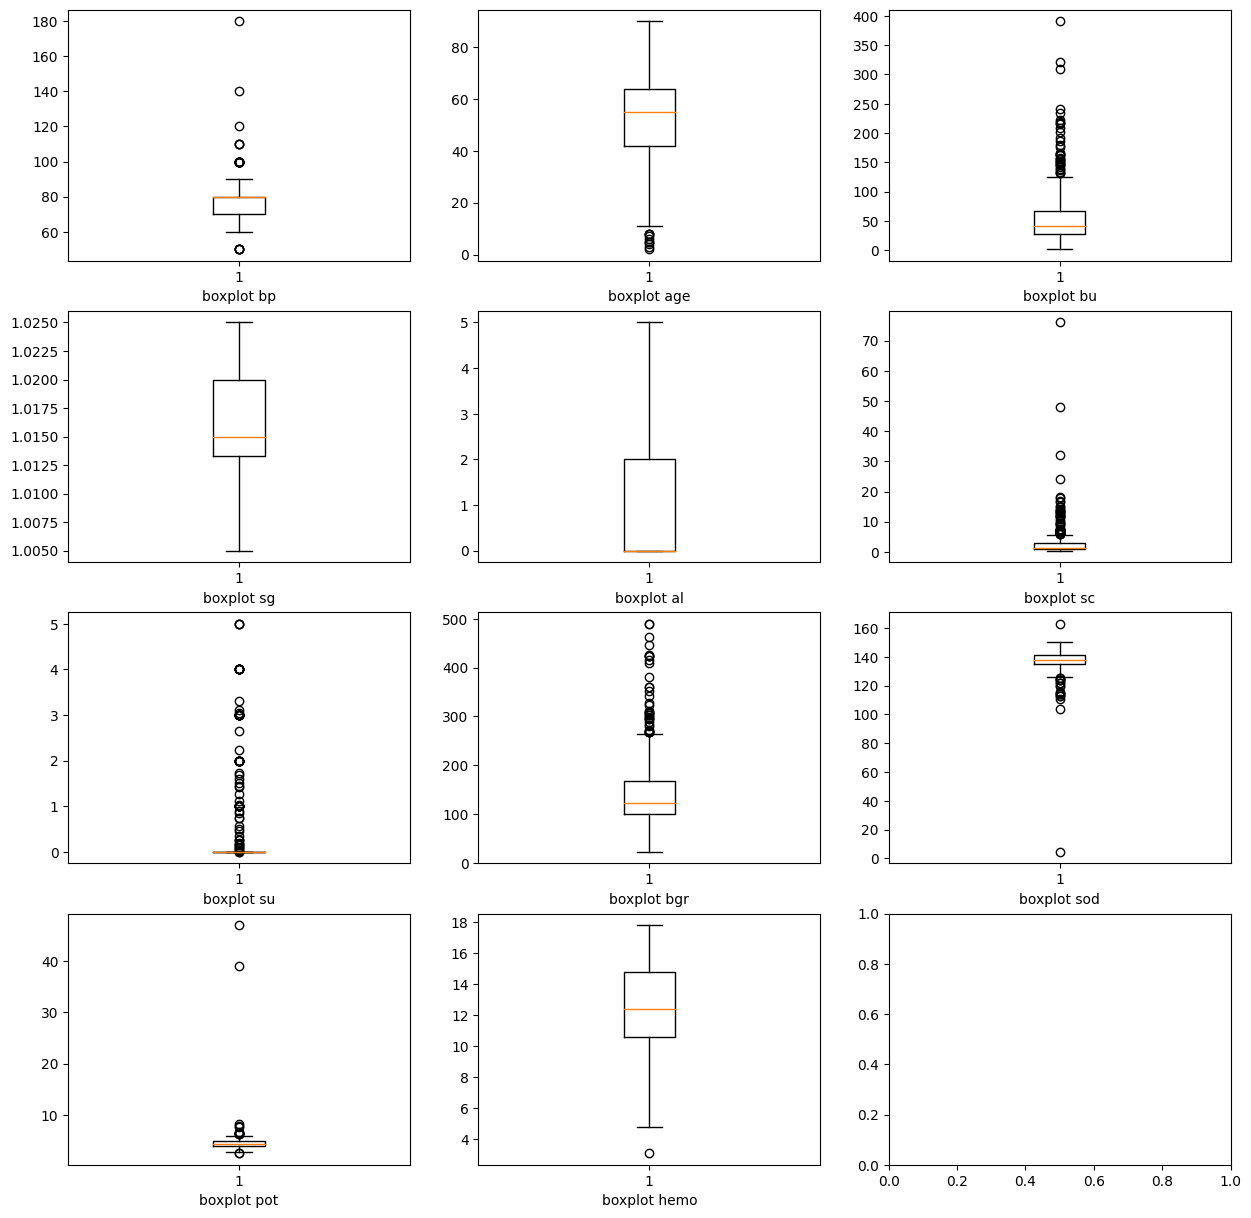

In [ ]:
figure, axe = plt.subplots(4,3,figsize=(15,15))
axe[0,0].boxplot(df['bp'])
axe[0,0].set_xlabel("boxplot bp")
axe[0,1].boxplot(df['age'])
axe[0,1].set_xlabel("boxplot age")
axe[0,2].boxplot(df['bu'])
axe[0,2].set_xlabel("boxplot bu")

axe[1,0].boxplot(df["sg"])
axe[1,0].set_xlabel("boxplot sg")
axe[1,1].boxplot(df["al"])
axe[1,1].set_xlabel("boxplot al")
axe[1,2].boxplot(df["sc"])
axe[1,2].set_xlabel("boxplot sc")
axe[2,0].boxplot(df["su"])
axe[2,0].set_xlabel("boxplot su")
axe[2,1].boxplot(df["bgr"])
axe[2,1].set_xlabel("boxplot bgr")
axe[2,2].boxplot(df["sod"])
axe[2,2].set_xlabel("boxplot sod")

axe[3,0].boxplot(df["pot"])
axe[3,0].set_xlabel("boxplot pot")
axe[3,1].boxplot(df["hemo"])
axe[3,1].set_xlabel("boxplot hemo")

plt.show()


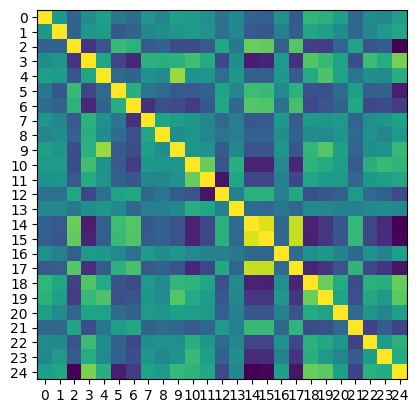

In [ ]:
# corplot=plt.imshow(dataset.corr())
fig, ax = plt.subplots()
im = ax.imshow(df.corr())

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
plt.show()
# , labels=dataset.columns
# np.arange(len(dataset.columns))

In [62]:
X = df.loc[:, df.columns != 'classification']
y = df['classification']

In [ ]:
min_max = MinMaxScaler()
min_max.fit(X)
X = min_max.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [97]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif




# Select the top 10 features based on their F-values and p-values
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the indices and p-values of the selected features
feature_indices = selector.get_support(indices=True)
p_values = selector.pvalues_

# Create a dictionary of feature names and p-values
feature_dict = {}
for i in range(len(X.columns)):
    feature_dict[X.columns[i]] = p_values[i]

# Sort the dictionary by p-value and print the top 10 features
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1])
print("Top 10 features based on p-value:")
for i in range(10):
    feature_name = sorted_features[i][0]
    feature_pvalue = sorted_features[i][1]
    print(i+1, feature_name, feature_pvalue)


Top 10 features based on p-value:
1 hemo 3.090547875910947e-77
2 sg 5.954000682785998e-72
3 pcv 6.861972124170909e-68
4 rc 2.796015069403856e-53
5 al 5.914159517958292e-47
6 rbc 1.4758166038407348e-42
7 htn 6.05405830293227e-39
8 dm 2.905388705198319e-34
9 pc 8.92280560014477e-22
10 bgr 1.8866130707218445e-18


In [ ]:
log = LogisticRegression()
cv_v = cross_val_score(log, X_train, y_train, cv=4)
print(cv_v)
print(cv_v.std())
print(cv_v.mean())

[0.9875 0.975  1.     1.    ]
0.01036445246986063
0.990625


In [ ]:
log.fit(X_train,y_train)


LogisticRegression()

In [ ]:
y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
import shap

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


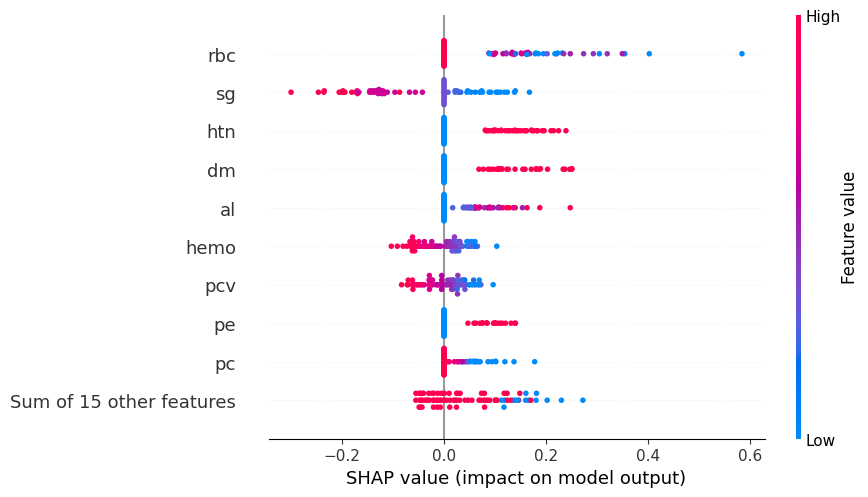

In [ ]:
shap.plots.beeswarm(shap_values)


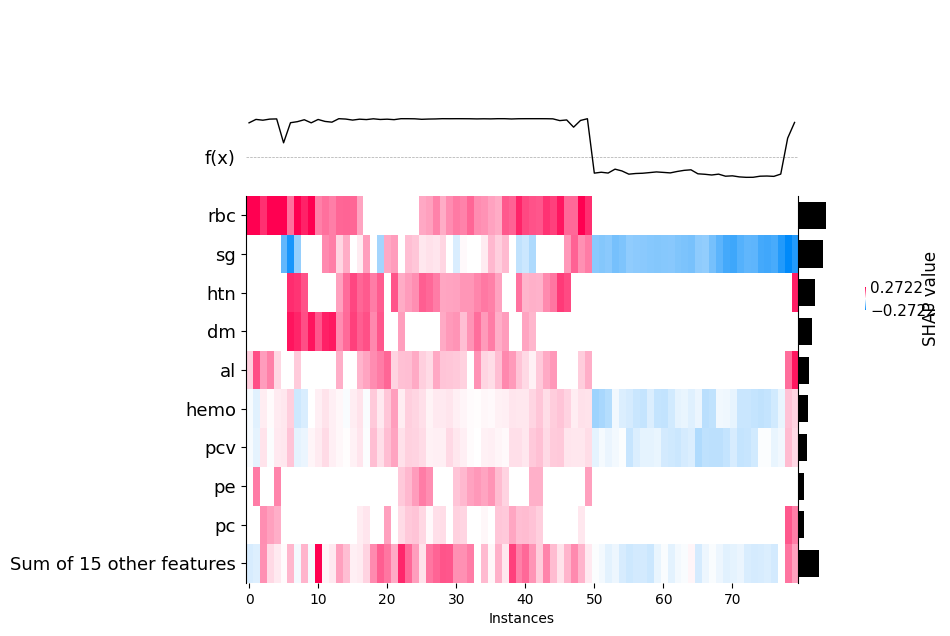

In [ ]:
shap.plots.heatmap(shap_values)


In [ ]:
# Convert X_test to pandas dataframe
X_train_df = pd.DataFrame(X_train, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])

In [ ]:
# Convert X_test to pandas dataframe
X_test_df = pd.DataFrame(X_test, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])

In [ ]:
f = lambda x: log.predict_proba(x)[:,1]
med = X_train_df.median().values.reshape((1,X_train_df.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test_df.iloc[0:1000,:])

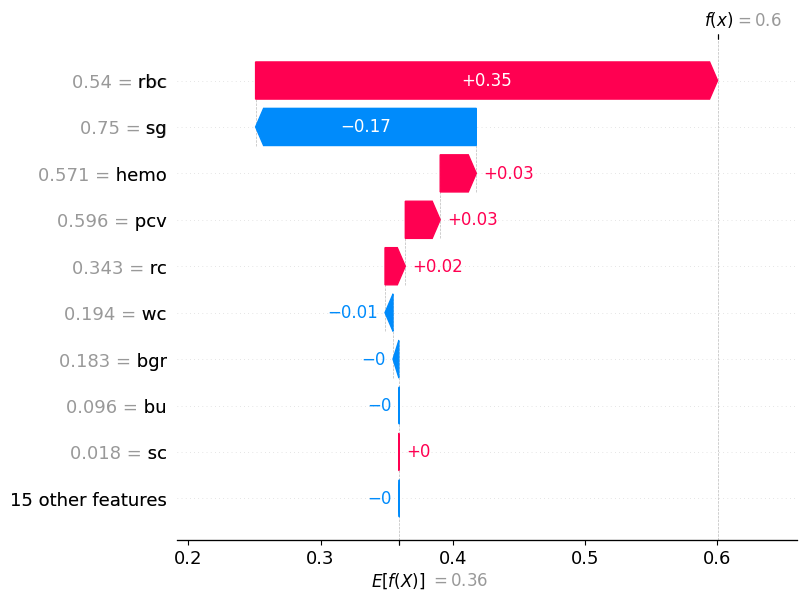

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
# Initialize explainer
explainer = shap.KernelExplainer(log.predict_proba, X_train)

# Compute Shapley values for first instance in X_test
shap_values = explainer.shap_values(X_test_df.iloc[0,:])

# Generate force plot for first instance in X_test
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_df.iloc[0,:])

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/80 [00:00<?, ?it/s]

Adaboost classifier


In [66]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train the AdaBoost classifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
ada.fit(X_train, y_train)


/home/syed/ls/envs/py39/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier on the testing set
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
# Print the evaluation metrics
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall:',recall)
print('F1 Score: ',f1)


Accuracy:  1.0
Precision:  1.0
Recall: 1.0
F1 Score:  1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.svm import SVC

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier on the testing set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
# Print the evaluation metrics
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall:',recall)
print('F1 Score: ',f1)


Accuracy:  0.69375
Precision:  0.8117647058823529
Recall: 0.6764705882352942
F1 Score:  0.7379679144385027


In [79]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)


/home/syed/ls/envs/py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier on the testing set
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


Accuracy: 0.93
Precision: 0.95
Recall: 0.93
F1 Score: 0.94


In [81]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier on the testing set
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(accuracy)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


0.9625
Accuracy: 0.96
Precision: 1.00
Recall: 0.94
F1 Score: 0.97


In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Train the Bagged Trees classifier
dt = DecisionTreeClassifier(max_depth=5)
bagging = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

/home/syed/ls/envs/py39/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  random_state=42)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier on the testing set
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall:',recall)
print('F1 Score: ',f1)

Accuracy:  1.0
Precision:  1.0
Recall: 1.0
F1 Score:  1.0


In [99]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select the 'age' and 'cholesterol' features
X = df[['hemo', 'sg']]
y = df['classification']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [101]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
from sklearn.svm import SVC

# Train the SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [104]:
y_pred = svm.predict(X_test)


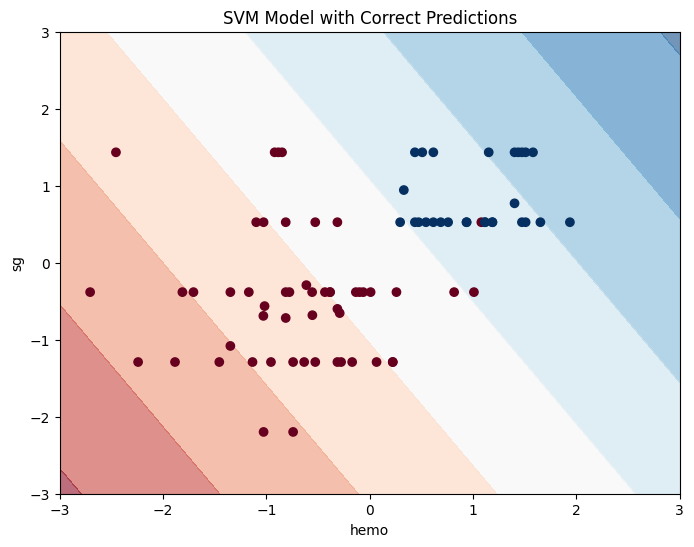

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid of points to evaluate the SVM model
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
xy = np.column_stack([xx.ravel(), yy.ravel()])

# Evaluate the SVM model on the meshgrid
Z = svm.decision_function(xy)
Z = Z.reshape(xx.shape)

# Plot the SVM model
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu_r)
plt.xlabel('hemo')
plt.ylabel('sg')
plt.title('SVM Model with Correct Predictions')
plt.show()
